# Building a CDS Survival Curve

Understand what a CDS survival curve is

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.products.credit import *
from financepy.products.rates import *
from financepy.finutils import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  24 Oct 2020 at 20:12 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Build Ibor Curve

In [4]:
valuationDate = TuringDate(20, 12, 2018)
settlementDate = valuationDate.addWeekDays(2)

In [6]:
dcType = TuringDayCountTypes.ACT_360
depo1 = TuringIborDeposit(settlementDate, "1M", 0.022009, dcType)
depo2 = TuringIborDeposit(settlementDate, "2M", 0.022138, dcType)
depo3 = TuringIborDeposit(settlementDate, "3M", 0.021810, dcType)
depo4 = TuringIborDeposit(settlementDate, "6M", 0.020503, dcType)
depo5 = TuringIborDeposit(settlementDate, "12M", 0.019930, dcType)
depos = [depo1,depo2,depo3,depo4,depo5]

swapType = TuringSwapTypes.PAY
dcType = TuringDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = TuringFrequencyTypes.SEMI_ANNUAL
swap1 = TuringIborSwap(settlementDate,"2Y",swapType,0.015910,fixedFreq,dcType)
swap2 = TuringIborSwap(settlementDate,"3Y",swapType,0.014990,fixedFreq,dcType)
swap3 = TuringIborSwap(settlementDate,"4Y",swapType,0.014725,fixedFreq,dcType)
swap4 = TuringIborSwap(settlementDate,"5Y",swapType,0.014640,fixedFreq,dcType)
swap5 = TuringIborSwap(settlementDate,"6Y",swapType,0.014800,fixedFreq,dcType)
swap6 = TuringIborSwap(settlementDate,"7Y",swapType,0.014995,fixedFreq,dcType)
swap7 = TuringIborSwap(settlementDate,"8Y",swapType,0.015180,fixedFreq,dcType)
swap8 = TuringIborSwap(settlementDate,"9Y",swapType,0.015610,fixedFreq,dcType)
swap9 = TuringIborSwap(settlementDate,"10Y",swapType,0.0159880,fixedFreq,dcType)
swap10 = TuringIborSwap(settlementDate,"12Y",swapType,0.016430,fixedFreq,dcType)
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

liborCurve = TuringIborSingleCurve(valuationDate, depos, [], swaps)

Inserting synthetic deposit


# Build a CDS Curve

In [7]:
cds1 = TuringCDS(settlementDate, "1Y", 0.0200)
cds2 = TuringCDS(settlementDate, "2Y", 0.0220)
cds3 = TuringCDS(settlementDate, "3Y", 0.0250)
cds4 = TuringCDS(settlementDate, "4Y", 0.0275)
cds5 = TuringCDS(settlementDate, "5Y", 0.0290)
cds6 = TuringCDS(settlementDate, "7Y", 0.0300)
cds7 = TuringCDS(settlementDate, "10Y", 0.0310)
cds8 = TuringCDS(settlementDate, "15Y", 0.0315)

In [8]:
cdss = [cds1, cds2, cds3, cds4, cds5, cds6, cds7, cds8]

In [9]:
recoveryRate = 0.40

In [11]:
issuerCurve = TuringCDSCurve(valuationDate, cdss, liborCurve, recoveryRate)

## Examine the Survival Curve

In [12]:
print(issuerCurve._times)

[ 0.          1.24931507  2.24931507  3.24931507  4.24931507  5.25205479
  7.25205479 10.25479452 15.25753425]


In [13]:
print(issuerCurve._values)

[1.         0.95865928 0.91965042 0.87076376 0.81836154 0.76921838
 0.68726229 0.57702864 0.43558352]


In [14]:
times = np.linspace(0.0,20.0,10)

In [15]:
times

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

In [16]:
survProbs = issuerCurve.survProb(times)

In [17]:
survProbs

array([1.        , 0.92068607, 0.80855848, 0.71030226, 0.62479089,
       0.54991191, 0.48533841, 0.42834746, 0.37804869, 0.33365626])

Text(0, 0.5, 'Survival Probability')

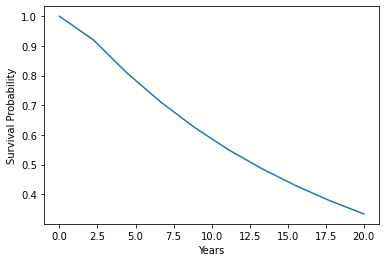

In [18]:
plt.plot(times, survProbs)
plt.xlabel("Years")
plt.ylabel("Survival Probability")

Copyright (c) 2020 Dominic O'Kane